In [15]:
import tensorflow as tf
from tensorflow.python import pywrap_tensorflow
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

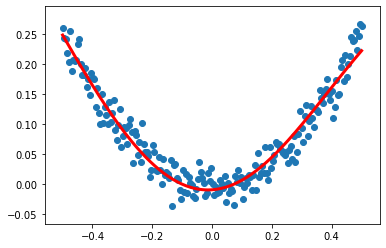

In [14]:
# 生成200个随机点，并改变为列向量
# np.newaxis的作用就是在这一位置增加一个一维，这一位置指的是np.newaxis所在的位置，把行向量转换为列向量
x_data = np.linspace(-0.5, 0.5, num=200)[:,np.newaxis]
noise = np.random.normal(0, 0.02, x_data.shape)
y_data =np.square(x_data) + noise

# 定义两个placeholder,[None, 1]定义形状
x = tf.placeholder(tf.float32, [None, 1])
y = tf.placeholder(tf.float32, [None, 1])

# 定义神经网络中间层, 10表示有10个神经元, 1表示输入值个数
Weights_L1 = tf.Variable(tf.random_normal([1, 10]))
biases_L1 = tf.Variable(tf.zeros([1, 10]))

# tf.cast() 改变张量类型
Wx_plus_b_L1 = tf.matmul(tf.cast(x_data,tf.float32), Weights_L1) + biases_L1
L1 = tf.nn.tanh(Wx_plus_b_L1)

# 定义神经网络输出层
Weights_L2 = tf.Variable(tf.random_normal([10, 1]))
biases_L2 = tf.Variable(tf.zeros([1, 1]))
Wx_plus_b_L2 = tf.matmul(L1, Weights_L2) + biases_L2
prediction = tf.nn.tanh(Wx_plus_b_L2)

# 二次代价函数
loss = tf.reduce_mean(tf.square(y-prediction))

# 使用梯度下降法训练
train = tf.train.GradientDescentOptimizer(0.1).minimize(loss)

# 定义会话
with tf.Session() as sess:
    #变量初始化
    sess.run(tf.global_variables_initializer())
    # 训练神经网络
    for step in range(2001):
        sess.run(train, feed_dict = {x: x_data, y:y_data})
    
    # 获得预测值
    prediction_values = sess.run(prediction, feed_dict={x:x_data})
    
    # 获取网络模型权重
#     pywrap_tensorflow.NewCheckpointReader()

    #画图
    plt.figure()
    plt.scatter(x_data, y_data)
    plt.plot(x_data, prediction_values, 'r-', lw=3)
    plt.show()
        